# **FINAL PROJECT STATPROB Kelas B Kelompok 2**
**Kelompok 2 Kelas B:**
- Dimas Andhika Diputra 5027231074
- Naufal Syafi' Hakim 5027231022
- Kharisma Fahrun Nisa 5027231086

# **TUJUAN**
Apa tujuan dari final project ini?
1. Mengetahui daerah mana yang paling sering mengalami gempa
2. Memahami bagaimana distribusi gempa bumi berdasarkan tahun, bulan, hari, dan jam.
3. Mengeksplorasi apakah ada kecenderungan tertentu untuk gempa bumi terjadi pada waktu-waktu tertentu.

# **AWALAN**
Dataset ini diambil dari Earthquake Repository yang dikelola oleh BMKG (lembaga pemerintah non departemen Indonesia). BMKG mengubah desain situsnya pada awal tahun 2023, sehingga menghasilkan dua dataset yang berbeda.

https://www.kaggle.com/datasets/kekavigi/earthquakes-in-indonesia

Variabel dalam dataset ini adalah:

- tgl: tanggal gempa
- ot: timestamp gempa
- lat : garis lintang pusat peristiwa (derajat), berkisar antara 6N sampai 11S
- lon : garis bujur episentrum peristiwa (derajat), berkisar antara 142E sampai 94E
- kedalaman: kedalaman kejadian (km)
- mag : besarnya magnitudo peristiwa, berkisar antara 1 sampai dengan 9,5

#### A. Import library yang dibutuhkan

In [1]:
# import libraries
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
# convert file csv ke data frame panda
df_raw = pd.read_csv('katalog_gempa.csv')

In [3]:
df_raw.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


# **PROSES**

#### B. Filter dan Transformasi Data

In [4]:
# hapus beberapa kolom data
df_raw = df_raw.drop(['strike1','dip1','rake1','strike2','dip2','rake2'], axis=1)

In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92887 entries, 0 to 92886
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tgl     92887 non-null  object 
 1   ot      92887 non-null  object 
 2   lat     92887 non-null  float64
 3   lon     92887 non-null  float64
 4   depth   92887 non-null  int64  
 5   mag     92887 non-null  float64
 6   remark  92887 non-null  object 
dtypes: float64(3), int64(1), object(3)
memory usage: 5.0+ MB


In [6]:
# konversi tanggal
import datetime
df_raw['tgl'] = df_raw['tgl'].apply(pd.to_datetime)

# ganti timestamp menjadi waktu
df_raw['ot'] = pd.to_datetime(df_raw['ot'], format='%H:%M:%S.%f').dt.round('H').dt.time

In [7]:
df_raw.head()

,tgl,ot,lat,lon,depth,mag,remark
0,2008-11-01,21:00:00,-9.18,119.06,10,4.9,Sumba Region - Indonesia
1,2008-11-01,21:00:00,-6.55,129.64,10,4.6,Banda Sea
2,2008-11-01,18:00:00,-7.01,106.63,121,3.7,Java - Indonesia
3,2008-11-01,16:00:00,-3.30,127.85,10,3.2,Seram - Indonesia
4,2008-11-01,16:00:00,-6.41,129.54,70,4.3,Banda Sea


# **KORELASI**

In [8]:
# extract the year,month,day,hour
df_raw = df_raw.assign(
    month=df_raw['tgl'].dt.month_name(),
    year=df_raw['tgl'].dt.year,
    day=df_raw['tgl'].dt.day_name(),
    hour=pd.to_datetime(df_raw['ot'], format='%H:%M:%S').dt.hour
)

df = df_raw.copy()

In [10]:
df = df.loc[(df['year']>=2009)&(df['year']<=2022)]
df = df.reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91395 entries, 0 to 91394
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   tgl     91395 non-null  datetime64[ns]
 1   ot      91395 non-null  object        
 2   lat     91395 non-null  float64       
 3   lon     91395 non-null  float64       
 4   depth   91395 non-null  int64         
 5   mag     91395 non-null  float64       
 6   remark  91395 non-null  object        
 7   month   91395 non-null  object        
 8   year    91395 non-null  int64         
 9   day     91395 non-null  object        
 10  hour    91395 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(4)
memory usage: 7.7+ MB


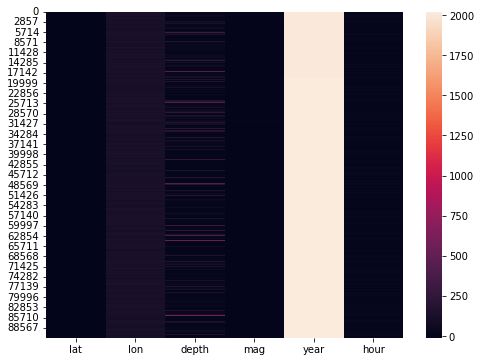

In [24]:
# import library
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# buat duplikat dataframe
df_cop = df.copy()

# buat heatmap
df_cop = df.drop(columns=['tgl', 'ot', 'remark', 'month', 'day'])
plt.figure(figsize=(8,6))
sns.heatmap(df_cop)

# display plot
plt.show()

# **ANALISIS**

- Pertanyaan panduan:
1. Daerah yang paling sering terjadi gempa?
2. Bagaimana sebaran gempa berdasarkan waktu (tahun, bulan, hari, jam)
3. Apa ciri-ciri semua gempa bumi yang terjadi?

In [ ]:

df # data yang akan analisis

,tgl,ot,lat,lon,depth,mag,remark,month,year,day,hour
0,2009-01-01,19:00:00,-4.37,101.12,10,5.1,Southern Sumatra - Indonesia,January,2009,Thursday,19
1,2009-01-01,17:00:00,-4.42,101.07,10,5.3,Southern Sumatra - Indonesia,January,2009,Thursday,17
2,2009-01-01,11:00:00,1.42,121.99,10,5.0,Minahassa Peninsula - Sulawesi,January,2009,Thursday,11
3,2009-01-01,09:00:00,1.47,122.12,10,4.5,Minahassa Peninsula - Sulawesi,January,2009,Thursday,9
4,2009-01-01,05:00:00,0.77,121.22,10,4.9,Minahassa Peninsula - Sulawesi,January,2009,Thursday,5
...,...,...,...,...,...,...,...,...,...,...,...
91390,2022-12-31,09:00:00,1.56,124.36,230,4.1,Minahassa Peninsula - Sulawesi,December,2022,Saturday,9
91391,2022-12-31,09:00:00,3.71,97.66,10,3.4,Northern Sumatra - Indonesia,December,2022,Saturday,9
91392,2022-12-31,05:00:00,0.35,122.01,167,2.7,Minahassa Peninsula - Sulawesi,December,2022,Saturday,5
91393,2022-12-31,05:00:00,-8.98,116.80,13,2.6,Sumbawa Region - Indonesia,December,2022,Saturday,5


##### Distribution by year

In [ ]:
fig_1 = df.groupby(['year'], as_index=False, sort=False).count()
px.bar(fig_1, y = 'mag', x = 'year',
        color = 'mag', height = 600,
        labels = {'mag': 'Frekuensi', 'year': 'Tahun'},
        title = 'Frekuensi per Tahun',
        barmode='group',
        text_auto='.2s'
)

In [ ]:
# deklarasi urutan bulan
order = ['Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni', 'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember']

# ubah kolom 'day' menjadi tipe kategorikal dalam urutan yang ditentukan
df['month'] = pd.Categorical(df['month'], categories=order, ordered=True)

##### Distribution by month

In [ ]:
fig_2 = df.groupby(['month'], as_index=False, sort=True).count()
px.bar(fig_2, y = 'mag', x = 'month',
       color= 'mag', height=600,
       labels={'mag': 'Frekuensi', 'month': 'Bulan'},
       title='Frekuensi per Bulan',
       barmode='group',
       text_auto='.2s'
)

In [ ]:
# 5th largest earthquake scale
np.sort(df.mag.unique())[-5:].tolist()

[7.2, 7.3, 7.5, 7.7, 7.9]

##### Distribution by day

In [ ]:
fig_4 = df.groupby(['day'], as_index=False, sort=True).count()
px.bar(fig_4, x='mag', y='day',
    color='mag',
    labels= {'mag': 'Frekuensi', 'day': 'Hari'},
    barmode='group',
    title= 'Frekuensi per Hari',
    text_auto='.2s'
)

Berdasarkan data, gempa banyak terjadi di bulan Desember, Januari, dan Agustus serta kerap terjadi di hari Senin dan banyak terjadi pada kurun waktu tahun 2018-2019. Meskipun begitu, faktanya **gempa bumi dapat terjadi kapan saja** tanpa memandang bulan atau waktu tertentu. Hal disebabkan oleh **pelepasan energi** yang dihasilkan oleh tekanan yang disebabkan oleh pergerakan lempeng yang bergerak ke satu arah atau lebih **secara aktif**.

##### Distribution by hour

In [ ]:
fig_3 = df.groupby(['hour'], as_index=False, sort=True).count()
px.bar(fig_3, y = 'mag', x = 'hour',
       color= 'mag', height=600,
       labels={'mag': 'Frekuensi', 'hour': 'Jam'},
       title='Frekuensi per Jam',
       barmode='group',
       text_auto='.2s'
)

Berdasarkan data diatas memang gempa paling banyak terjadi pada waktu **menjelang malam hari** yaitu pada jam **17.00** namun anggapan bahwa gempa lebih sering terjadi pada **malam hari** dibandingkan **siang hari** dapat dipatahkan karena gempa yang terjadi di **siang hari** pada data (06.00-18.00) juga sama banyaknya bahkan jika dijumlahkan jumlah gempa yang terjadi pada **siang hari** **lebih banyak** daripada gempa yang terjadi pada **malam/dini hari** (18.00-5.00).

##### Distribution by place

In [ ]:
df_remark = pd.pivot_table(
    df, values='mag',index='remark',aggfunc='count',sort=True
)
df_remark_sorted = df_remark.sort_values(by=['mag'], ascending=False).reset_index()
df_remark_sorted.head(5)

,remark,mag
0,Minahassa Peninsula - Sulawesi,9331
1,Sulawesi - Indonesia,7852
2,Sumbawa Region - Indonesia,7251
3,Java - Indonesia,6675
4,Northern Sumatra - Indonesia,5847


Data diatas sesuai dengan fakta bahwa kebanyakan gempa terjadi di daerah ring of fire yaitu di sekitaran **Sumatra, Jawa, Sulawesi, Nusa Tenggara, hingga Maluku.**



---
Peta Ring of Fire:<br>
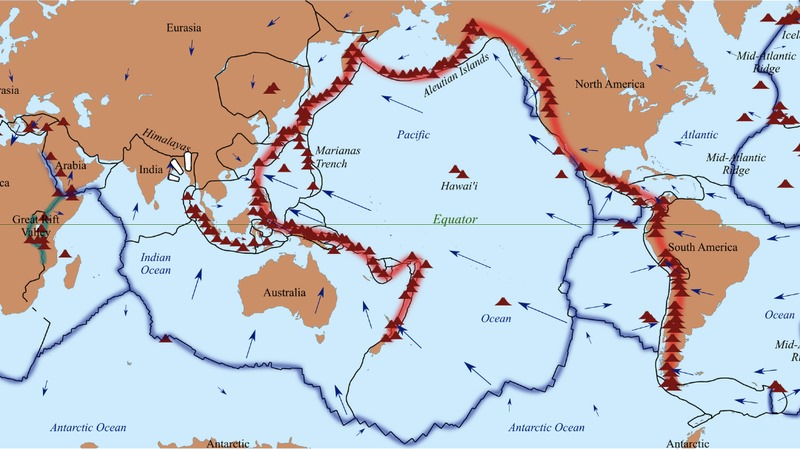





In [ ]:
px.bar(df_remark_sorted, y = 'mag', x = 'remark',
       color= 'mag', height=600,
       labels={'mag': 'Frekeunsi', 'remark': 'Tempat'},
       title='Frekuensi per Lokasi',
       barmode='group',
       text_auto='.2s'
)

##### Characteristics of all the earthquakes

In [ ]:
# kedalaman gempa buminya
Templist = []
for i in df['depth'].tolist():
    tempVar = ''
    if (i < 60) :
        tempVar = 'dangkal'
    elif (60 < i < 300) :
        tempVar = 'sedang'
    else:
        tempVar = 'dalam'
    Templist.append(tempVar)
df['DepthCategory'] = Templist
df.head()

,tgl,ot,lat,lon,depth,mag,remark,month,year,day,hour,DepthCategory
0,2009-01-01,19:00:00,-4.37,101.12,10,5.1,Southern Sumatra - Indonesia,NaN,2009,Thursday,19,dangkal
1,2009-01-01,17:00:00,-4.42,101.07,10,5.3,Southern Sumatra - Indonesia,NaN,2009,Thursday,17,dangkal
2,2009-01-01,11:00:00,1.42,121.99,10,5.0,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,11,dangkal
3,2009-01-01,09:00:00,1.47,122.12,10,4.5,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,9,dangkal
4,2009-01-01,05:00:00,0.77,121.22,10,4.9,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,5,dangkal


In [ ]:
# the strength of the earthquake
Templist = []
for i in df['mag'].tolist():
    tempVar = ''
    if (i < 3.0) :
        tempVar = 'mikro'
    elif (i < 4.0) :
        tempVar = 'kecil'
    elif (i < 5.0):
        tempVar = 'ringan'
    elif (i < 6.0):
        tempVar = 'sedang'
    elif (i < 7.0):
        tempVar = 'kuat'
    else:
        tempVar = 'mayor'
    Templist.append(tempVar)
df['MagCategory'] = Templist
df.head()

,tgl,ot,lat,lon,depth,mag,remark,month,year,day,hour,DepthCategory,MagCategory
0,2009-01-01,19:00:00,-4.37,101.12,10,5.1,Southern Sumatra - Indonesia,NaN,2009,Thursday,19,dangkal,sedang
1,2009-01-01,17:00:00,-4.42,101.07,10,5.3,Southern Sumatra - Indonesia,NaN,2009,Thursday,17,dangkal,sedang
2,2009-01-01,11:00:00,1.42,121.99,10,5.0,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,11,dangkal,sedang
3,2009-01-01,09:00:00,1.47,122.12,10,4.5,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,9,dangkal,ringan
4,2009-01-01,05:00:00,0.77,121.22,10,4.9,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,5,dangkal,ringan


In [ ]:
fig_5 = df.groupby(['DepthCategory'], as_index=False, sort=True).count()
px.bar(fig_5, y = 'tgl', x = 'DepthCategory',
       color= 'DepthCategory', height=600,
       labels={'tgl': 'Frekuensi', 'DepthCategory': 'Kategori Kedalaman'},
       title='Frekuensi berdasarkan Kategori Kedalaman'
)

In [ ]:
fig_6 = df.groupby(['MagCategory'], as_index=False, sort=True).count()
px.bar(fig_6, y = 'tgl', x = 'MagCategory',
       color= 'MagCategory', height=600,
       labels={'tgl': 'Frekuensi', 'MagCategory': 'Kategori Magnitudo'},
       title='Frekuensi berdasarkan Kekuatan Gempa'
)

In [ ]:
df

,tgl,ot,lat,lon,depth,mag,remark,month,year,day,hour,DepthCategory,MagCategory
0,2009-01-01,19:00:00,-4.37,101.12,10,5.1,Southern Sumatra - Indonesia,NaN,2009,Thursday,19,dangkal,sedang
1,2009-01-01,17:00:00,-4.42,101.07,10,5.3,Southern Sumatra - Indonesia,NaN,2009,Thursday,17,dangkal,sedang
2,2009-01-01,11:00:00,1.42,121.99,10,5.0,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,11,dangkal,sedang
3,2009-01-01,09:00:00,1.47,122.12,10,4.5,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,9,dangkal,ringan
4,2009-01-01,05:00:00,0.77,121.22,10,4.9,Minahassa Peninsula - Sulawesi,NaN,2009,Thursday,5,dangkal,ringan
...,...,...,...,...,...,...,...,...,...,...,...,...,...
91390,2022-12-31,09:00:00,1.56,124.36,230,4.1,Minahassa Peninsula - Sulawesi,NaN,2022,Saturday,9,sedang,ringan
91391,2022-12-31,09:00:00,3.71,97.66,10,3.4,Northern Sumatra - Indonesia,NaN,2022,Saturday,9,dangkal,kecil
91392,2022-12-31,05:00:00,0.35,122.01,167,2.7,Minahassa Peninsula - Sulawesi,NaN,2022,Saturday,5,sedang,mikro
91393,2022-12-31,05:00:00,-8.98,116.80,13,2.6,Sumbawa Region - Indonesia,NaN,2022,Saturday,5,dangkal,mikro


In [ ]:
data = pd.pivot_table(
    df, values='mag', index=['remark','MagCategory'], aggfunc='sum', sort=True
)
data.head().reset_index()

,remark,MagCategory,mag
0,Arafura Sea,kuat,6.1
1,Arafura Sea,ringan,9.2
2,Arafura Sea,sedang,20.3
3,Aru Islands Region - Indonesia,kecil,36.1
4,Aru Islands Region - Indonesia,ringan,394.0


In [ ]:
px.bar((df.groupby(by=['year','MagCategory'], as_index=False, sort=True).count()),
       y = 'mag', x = ['year','MagCategory'],
       color= 'MagCategory', height=600,
       labels={'tgl': 'Frekuensi', 'DepthCategory': 'Kategori Kedalaman'},
       title='Frekuensi berdasarkan Kategori Kedalaman',
       barmode='group'
)

Kita dapat mengkategorikan jenis gempa berdasarkan kedalaman sumber gempa, magnitudo dan kekuatan gempa tersebut. Berdasarkan kedalaman sumber gempanya, gempa kedalaman **dangkal sering terjadi** dengan frekuensi **70 ribu kasus**. Sementara menurut magnitudo gempanya, gempa berskala kecil lebih banyak terjadi.

# **SUMMARY**

Data tersebut menampilkan sebaran frekuensi gempa pada tahun 2008 hingga 2023 dan pada tahun tersebut gempa paling sering terjadi pada tahun 2018 hingga 2019. Selain itu, pada tahun 2008 hingga 2023 ditemukan:
- 5 wilayah yang paling sering terjadi gempa adalah Semenanjung Minahasa, Sulawesi, Sumbawa, Jawa, dan Sumatera Utara
- Gempa bumi sering terjadi di daerah tersebut karena daerah tersebut merupakan area Ring of Fire

- Gempa bumi paling sering terjadi pada bulan **Desember, Januari, dan Agustus**
- Gempa bumi paling sering terjadi pada hari **Senin**
- Gempa bumi terbagi dalam beberapa kategori berdasarkan kedalaman sumber gempa, kekuatan magnitudo dan kekuatan gempa.

- Gempa bumi paling sering terjadi pada jam **14.00 - 20.00**
- Meskipun dari data gempa sering terjadi pada kurun bulan, hari, dan jam tertentu, kenyataaannya gempa bumi **selalu terjadi karena aktifitas aktif pergerakan lempeng bumi** dan **tidak terikat pada waktu - waktu tertentu**